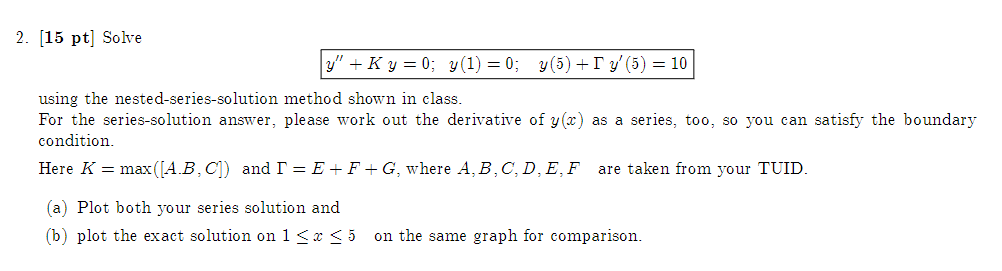

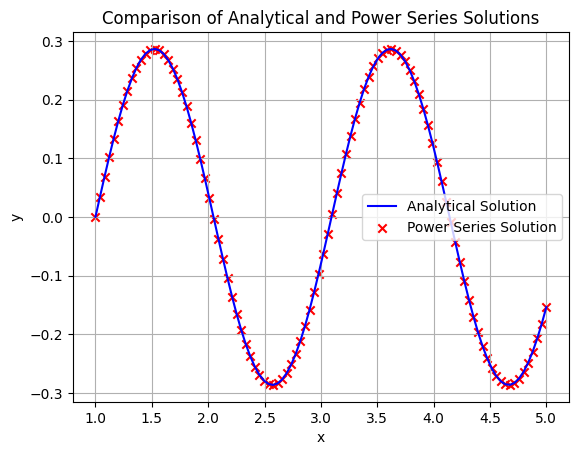

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the analytical solution function
def y_analytical(x, A, B):
    return A * np.cos(3*x) + B * np.sin(3*x)

# Function to solve for A and B using boundary conditions
def solve_constants():
    def equations(p):
        A, B = p
        return (y_analytical(1, A, B), y_analytical(5, A, B) + 14 * (-3 * A * np.sin(3*5) + 3 * B * np.cos(3*5)) - 10)
    A, B = fsolve(equations, (1, 1))
    return A, B

A, B = solve_constants()

# Function to compute coefficients for the power series
def compute_coefficients(n_terms, c0, c1):
    coeffs = np.zeros(n_terms)
    coeffs[0], coeffs[1] = c0, c1
    for k in range(2, n_terms):
        coeffs[k] = -9 * coeffs[k-2] / (k * (k-1))
    return coeffs

def find_n_terms(x_max):
    n_terms = 2
    while True:
        F_N = -9 / (n_terms * (n_terms - 1))
        if abs(F_N * x_max * 2) < 1e-3:
            break
        n_terms += 1
    return n_terms

# x_max is the maximum value of x you are interested in
x_max = 5
n_terms = find_n_terms(x_max)

# Find c0 and c1 by solving the boundary conditions numerically
def solve_power_series_constants():
    def equations(p):
        c0, c1 = p
        coeffs = compute_coefficients(n_terms, c0, c1)
        y_at_1 = np.sum(coeffs * 1**np.arange(n_terms))
        y_at_5 = np.sum(coeffs * 5.0**np.arange(n_terms))
        y_prime_at_5 = np.sum(coeffs * np.arange(n_terms) * 5.0**(np.arange(n_terms) - 1))
        return (y_at_1, y_at_5 + 14 * y_prime_at_5 - 10)
    c0, c1 = fsolve(equations, (1, 1))
    return c0, c1

c0, c1 = solve_power_series_constants()

# Compute the coefficients for the power series solution
coeffs = compute_coefficients(n_terms, c0, c1)

# Function to compute the power series value for an array of x values
def y_power_series(x_vals):
    return np.array([np.sum(coeffs * x**np.arange(n_terms)) for x in x_vals])

# Generate data for plotting
x_vals = np.linspace(1, 5, 100)
y_analytical_vals = y_analytical(x_vals, A, B)
y_power_series_vals = y_power_series(x_vals)

# Plot the results
plt.plot(x_vals, y_analytical_vals, label='Analytical Solution', color='blue')
plt.scatter(x_vals, y_power_series_vals, label='Power Series Solution', color='red', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Analytical and Power Series Solutions')
plt.legend()
plt.grid(True)
plt.show()
